<a href="https://colab.research.google.com/github/yashyaks/compute_tasks/blob/main/Lab1.1.2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

Load Dataset

In [ ]:
df=pd.read_csv('/content/sample_data/foodtruck.txt')
df

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


Visualise Data

Text(0.5, 1.0, 'Population Vs Profit')

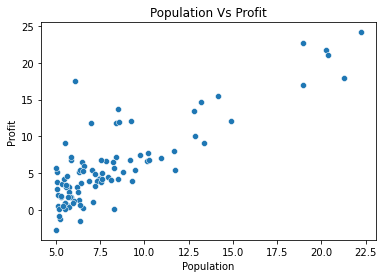

In [ ]:
ax = sns.scatterplot(x = "Population", y = "Profit", data = df)
ax.set_title("Population Vs Profit")

<AxesSubplot:>

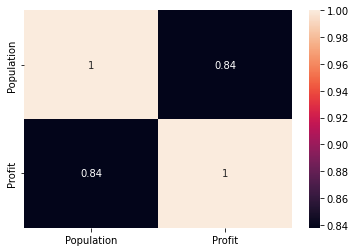

In [ ]:
sns.heatmap(df.corr(),annot=True)

Split Dataset into training and testing dataset 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop("Profit",axis=1)
y=df["Profit"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

In [ ]:
print("Number of samples in whole dataset:",len(df))
print("Number of samples in training dataset:",len(X_train))
print("Shape of X_train:",X_train.shape)
print("Number of samples in testing dataset:",len(X_test))
print("Shape of X_test:",X_test.shape)

Number of samples in whole dataset: 97
Number of samples in training dataset: 58
Shape of X_train: (58, 1)
Number of samples in testing dataset: 39
Shape of X_test: (39, 1)


Import Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=reg.predict(X_test)
y_pred

array([ 5.17502301,  5.0324138 ,  7.09647673,  3.78190997,  8.18129725,
        3.11591257,  4.74179266,  9.78635437,  4.36394015,  6.95015315,
        2.96508672, 19.432455  ,  3.14709074,  4.49979597,  2.27533988,
        2.83902333,  2.36628561,  4.60098435,  2.92749282,  3.74521652,
        6.20547869,  6.08144131,  7.61254875, 17.94108005,  5.95200122,
        7.02669164,  5.10422491,  2.96621229,  3.73767523,  3.77459379,
        4.03403675, 11.05599282,  2.79670205,  2.80716981,  8.95005883,
        3.58347268,  8.13852574,  2.52915501,  5.54679746])

Visualise the model

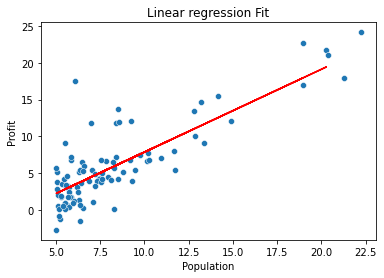

In [ ]:
sns.scatterplot(x = "Population", y = "Profit", data = df)
plt.plot(X_test,y_pred,color="red")

plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Linear regression Fit");

Check Overfitting or Underfitting 

In [ ]:
import sklearn.metrics as skm

In [ ]:
mse=skm.mean_squared_error(y_test, y_pred)
mse

9.60971593259975

In [ ]:
reg.score(X_train,y_train)

0.7193323954664781

In [ ]:
reg.score(X_test,y_test)

0.6688557540741457

Apply Regulisation using Lasso or Ridge Regression

In [ ]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=0.1, max_iter=1000,tol=0.1)
lasso_reg.fit(X_test,y_test)

Lasso(alpha=0.1, tol=0.1)

In [ ]:
lasso_reg.score(X_test,y_test)

0.6888014595673204

In [ ]:
lasso_reg.score(X_train,y_train)

0.6914310168751615

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=60, max_iter=1000,tol=0.1)


In [ ]:
ridge_reg.fit(X_train,y_train)

Ridge(alpha=60, max_iter=1000, tol=0.1)

In [ ]:
ridge_reg.score(X_train,y_train)

0.7170805587688678

In [ ]:
ridge_reg.score(X_test,y_test)

0.6565908193613013

Regularisation done by Lasso Regression is much effective than Ridge regression